# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(include=['int','float'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [5]:
#your code here- categorical variable
titanic.select_dtypes(exclude=['int','float'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.figure(figsize=(12,6))
plt.style.use("classic")

<Figure size 864x432 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

(array([12., 10., 12.,  7., 10.,  0.,  5.,  6.,  4.,  6.,  3., 10.,  4.,
         4.,  4.,  4., 13., 10.,  7., 19.,  0., 20., 46., 29., 28.,  1.,
        47., 46., 44., 65.,  7., 36., 36., 36., 63.,  5., 62., 49., 26.,
        27., 48., 23., 17., 30., 32.,  3.,  9., 15., 25., 18.,  9., 17.,
        20.,  9., 13.,  2., 23., 12., 15., 16.,  6.,  9., 17.,  9.,  6.,
         1.,  4., 10.,  8.,  5.,  0.,  5.,  6.,  3.,  7.,  1.,  6.,  5.,
         4.,  5.,  0.,  3.,  1.,  1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.17  ,  0.9683,  1.7666,  2.5649,  3.3632,  4.1615,  4.9598,
         5.7581,  6.5564,  7.3547,  8.153 ,  8.9513,  9.7496, 10.5479,
        11.3462, 12.1445, 12.9428, 13.7411, 14.5394, 15.3377, 16.136 ,
        16.9343, 17.7326, 18.5309, 19.3292, 20.1275, 20.9258, 21.7241,
        22.5224, 23.3207, 24.119 , 24.9173, 25.7156, 26.5139, 27.3122,
        28.1105, 28.9088, 29.7071, 30.5054, 31.3037, 32.102 , 32.9003,
        

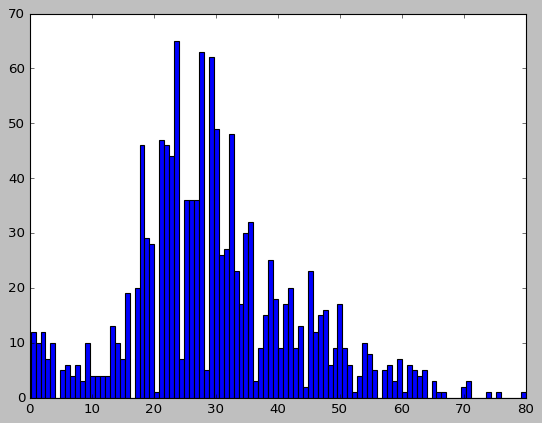

In [7]:
# your code here
plt.hist(titanic["Age"], bins=100)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

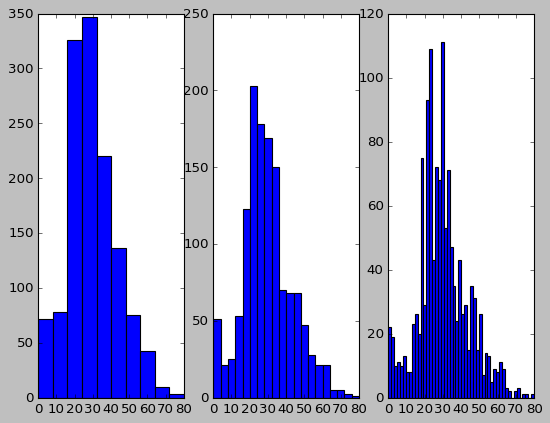

In [8]:
# your code here
plt.subplot(1,3,1)
plt.hist(titanic["Age"], bins=10)
plt.subplot(1,3,2)
plt.hist(titanic["Age"], bins=20)
plt.subplot(1,3,3)
plt.hist(titanic["Age"], bins=50)

#### Whether the bin size affects your plot? Why?


With more bin size, my plot change the appearance of the histogram, because data gets grouped differently

#### Use seaborn to show the distribution of the column `Age`

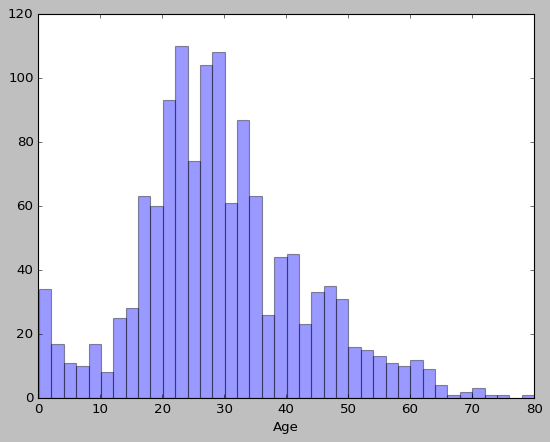

In [9]:
# your code here
sns.distplot(titanic["Age"], bins=40,kde=False)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

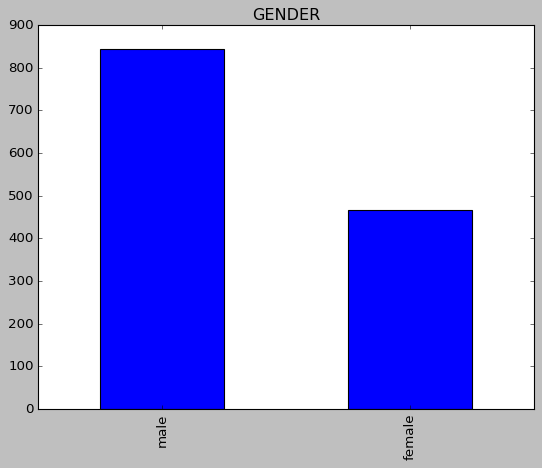

In [10]:
# your code here- 1st way
titanic["Gender"].value_counts().plot(kind='bar',title = "GENDER")

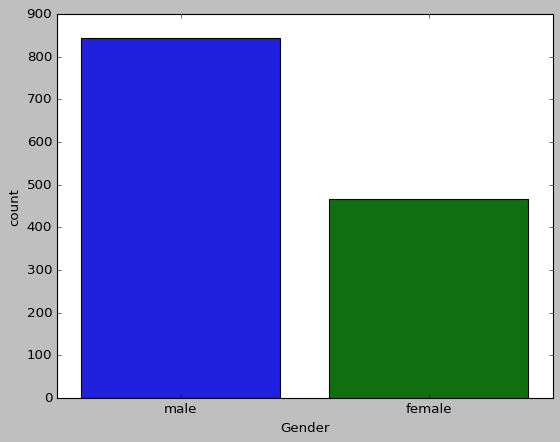

In [11]:
# your code here- 2nd way
sns.countplot(titanic["Gender"])

#### Use the appropriate plot to visualize the column `Pclass` 


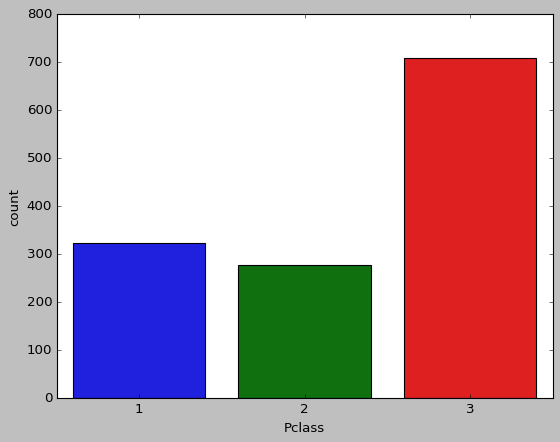

In [12]:
# your code here
sns.countplot(titanic["Pclass"])

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

#### What does the previous plot tell you about the feature `Age`? Comment.

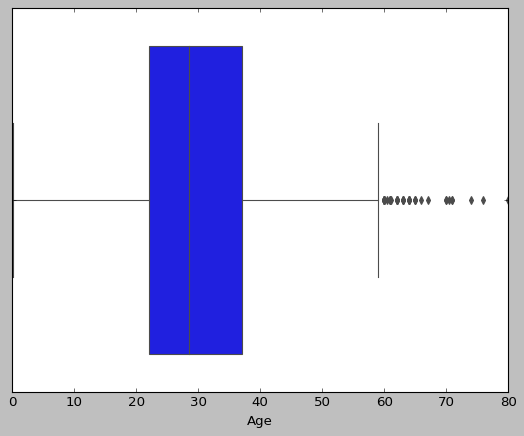

In [13]:
# your code here
sns.boxplot(titanic["Age"])

# your comment here
Most Titanic passengers were between 20-40 years old, only a few passengers were over 60 years old

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

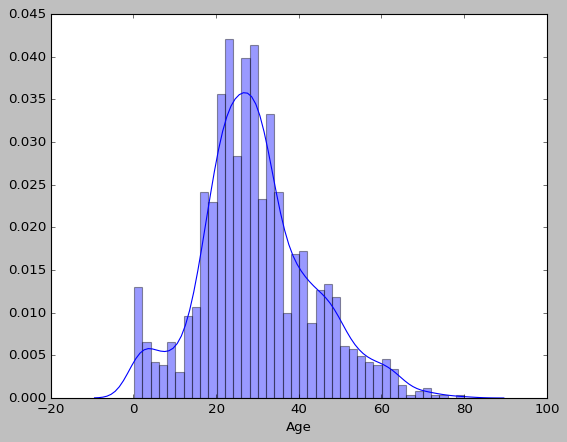

In [14]:
#your code here
sns.distplot(titanic["Age"], bins=40)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.


We show a gaussian kernel density estimate too

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

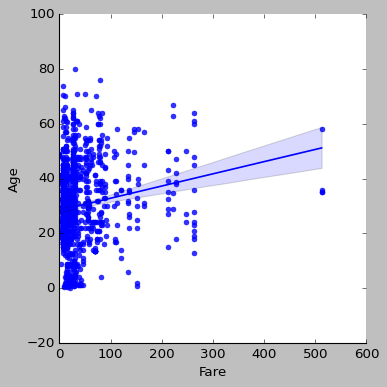

In [15]:
#your code-1st way

sns.lmplot(x="Fare", y="Age",data=titanic)

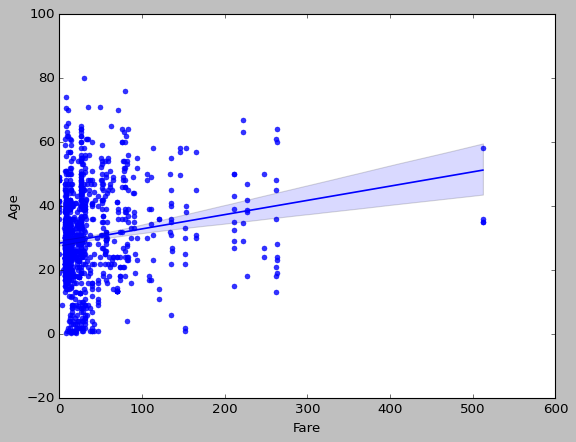

In [16]:
# your code-2nd way
sns.regplot(x='Fare',y='Age',data=titanic)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

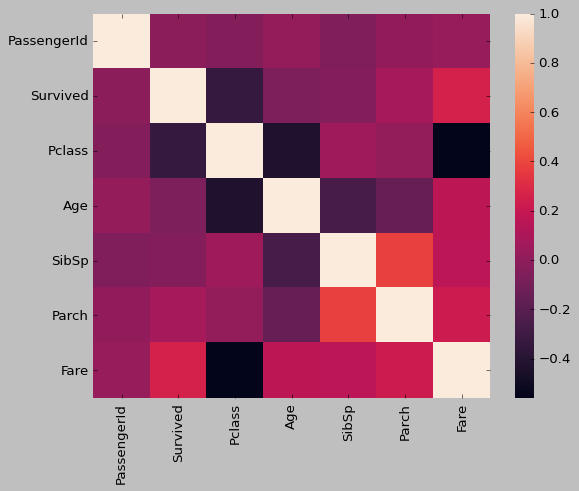

In [17]:
#your code here
sns.heatmap(titanic.corr())

#### According to the previous plot, what are the most correlated feature? Comment.

In [18]:
#your comment here
#SibSp & Parch

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

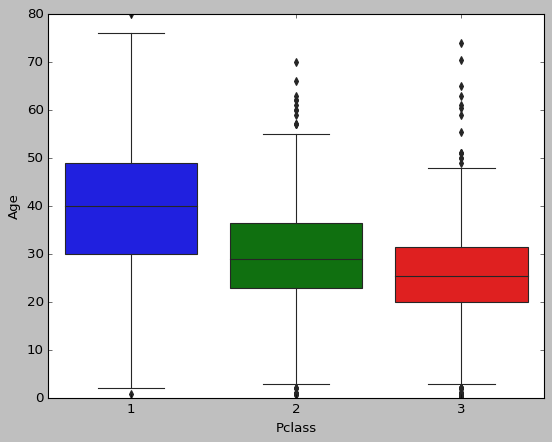

In [19]:
#your code here
sns.boxplot(x="Pclass", y="Age", data=titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

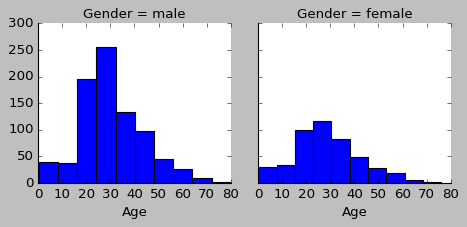

In [20]:
#your code her3
g = sns.FacetGrid(data=titanic,col="Gender")
g = g.map(plt.hist, "Age")
g
